# Project Object:

Say this is you and you live on the west side of the city of Toronto in Canada. You love your neighborhood, mainly because of all the great amenities and other types of venues that exist in the neighborhood, such as gourmet fast food joints, pharmacies, parks, grad schools and so on. Now say you receive a job offer from a great company on the other side of the city with great career prospects. However given the far distance from your current place you unfortunately must move if you decide to accept the offer. Wouldn't it be great if you're able to determine neighborhoods on the other side of the city that are exactly the same as your current neighborhood, and if not perhaps similar neighborhoods that are at least closer to your new job?

# How:

Given a city like the City of Toronto, you will segment it into different neighborhoods using the geographical coordinates of the center of each neighborhood, and then using a combination of location data and machine learning, you will group the neighbourhoods into clusters like this.

# Packages:

In [64]:
!pip install wikipedia
!pip install folium

In [65]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import wikipedia
import json
import requests
import folium
from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Quest 1: Download and Explore Neighborhoods in Toronto

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format like the New York dataset.

Once the data is in a structured format, you can replicate the analysis that we did to the New York City dataset to explore and cluster the neighborhoods in the city of Toronto.

### 1.1 Get Canada FSA Table

In [66]:
import pandas as pd
import wikipedia as wp
html = wp.page("List_of_postal_codes_of_Canada:_M").html().encode("UTF-8")
df = pd.read_html(html)[0]  # Try 2nd table first as most pages contain contents table first
df

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Queen's Park,Not assigned


### 1.2 Clean the dataset by:

1. Aggregate the neighborhoods sections
2. Clean up the "Not Assigned" neighborhoods

In [67]:
postal_borough = {}

# Clean up the df by removing not assigned postal code
df = df[df.Borough != 'Not assigned']

# Assign borough to "Not assigned" Neighborhoods
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']
        

# Aggregate boroughs and neighborhoods
df = df.groupby(['Postcode','Borough'], sort = False).agg(lambda x: ', '.join(x))

df = df.reset_index()

df.head(10)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park
5,M9A,Queen's Park,Queen's Park
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


### 1.3 Find the Longitude and Latitude of each Borough(FSA)

### 1.3.1 Load the geospatial data

In [68]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


### 1.3.2 Find the matching postal code

In [69]:
result = pd.merge(df, geospatial, left_on='Postcode', right_on='Postal Code')
result.drop(['Postal Code'], axis=1, inplace=True)
result

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
5,M9A,Queen's Park,Queen's Park,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [70]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


## 1.4 Create a map of Toronto with neighborhoods superimposed on top.

In [71]:
toronto_lat = 43.6532
toronto_long = -79.3832

map_toronto = folium.Map(location=[toronto_lat, toronto_long], zoom_start = 10)

for lat, lon, borough, neighborhood in zip(result['Latitude'], result['Longitude'], result['Borough'], result['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
                [lat, lon],
                radius=5,
                popup=label,
                color='red',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_toronto)

map_toronto

## 1.5 Use Foursquare to explore the borough

In [72]:
# The code was removed by Watson Studio for sharing.

### 1.5.1 Start with one borough only

In [73]:
i = 10

borough_name = result.loc[i, 'Borough']
borough_fsa = result.loc[i, 'Postcode']
borough_latitude = result.loc[i, 'Latitude'] # neighborhood latitude value
borough_longitude = result.loc[i, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} {} are {}, {}.'.format(borough_name, borough_fsa,
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of North York M6B are 43.709577, -79.44507259999999.


In [74]:
radius = 5000
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)

In [75]:
explores = requests.get(url).json()

with open('explores.json', 'w') as f:
    json.dump(explores, f)
    
    
explores

{'meta': {'code': 200, 'requestId': '5e54512678a484001bbe6ff4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 230,
  'suggestedBounds': {'ne': {'lat': 43.75457704500005,
    'lng': -79.38293533507785},
   'sw': {'lat': 43.66457695499996, 'lng': -79.50720986492213}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5810fe9138fabe486b7d632c',
       'name': 'Nordstrom',
       'location': {'address': '3401 Dufferin Street, Unit 500',
        'lat': 43.7260545,
        'lng': -79.4494431,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.7260545,
          'lng': -

In [76]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [77]:
venues = explores['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


## Quest 2: Explore Neighborhoods in Toronto

In [78]:
def getNearbyVenues(names, fsas, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, fsa, lat, lng in zip(names, fsas, latitudes, longitudes):
        print(name, fsa)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [79]:
toronto_venues = getNearbyVenues(names=result['Borough'],
                                 fsas=result['Postcode'],
                                   latitudes=result['Latitude'],
                                   longitudes=result['Longitude']
                                  )

North York M3A
North York M4A
Downtown Toronto M5A
North York M6A
Downtown Toronto M7A
Queen's Park M9A
Scarborough M1B
North York M3B
East York M4B
Downtown Toronto M5B
North York M6B
Etobicoke M9B
Scarborough M1C
North York M3C
East York M4C
Downtown Toronto M5C
York M6C
Etobicoke M9C
Scarborough M1E
East Toronto M4E
Downtown Toronto M5E
York M6E
Scarborough M1G
East York M4G
Downtown Toronto M5G
Downtown Toronto M6G
Scarborough M1H
North York M2H
North York M3H
East York M4H
Downtown Toronto M5H
West Toronto M6H
Scarborough M1J
North York M2J
North York M3J
East York M4J
Downtown Toronto M5J
West Toronto M6J
Scarborough M1K
North York M2K
North York M3K
East Toronto M4K
Downtown Toronto M5K
West Toronto M6K
Scarborough M1L
North York M2L
North York M3L
East Toronto M4L
Downtown Toronto M5L
North York M6L
North York M9L
Scarborough M1M
North York M2M
North York M3M
East Toronto M4M
North York M5M
York M6M
North York M9M
Scarborough M1N
North York M2N
North York M3N
Central Toronto M4

In [80]:
print(toronto_venues.shape)
toronto_venues.head(10)

(10271, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,North York,43.753259,-79.329656,Donalda Golf & Country Club,43.752816,-79.342741,Golf Course
2,North York,43.753259,-79.329656,Starbucks Reserve Bar,43.735764,-79.344156,Coffee Shop
3,North York,43.753259,-79.329656,Galleria Supermarket,43.753520,-79.349518,Supermarket
4,North York,43.753259,-79.329656,Me Va Me Kitchen Express,43.754957,-79.351894,Mediterranean Restaurant
5,North York,43.753259,-79.329656,North Beach Indoor Volleyball Academy,43.737191,-79.323714,Gym / Fitness Center
6,North York,43.753259,-79.329656,Kostas Meat Market,43.760605,-79.301830,Greek Restaurant
7,North York,43.753259,-79.329656,VIA CIBO | italian streetfood,43.754067,-79.357951,Italian Restaurant
8,North York,43.753259,-79.329656,Naan & Kabob Halal,43.742903,-79.305148,Middle Eastern Restaurant
9,North York,43.753259,-79.329656,LA Fitness,43.747665,-79.347077,Gym / Fitness Center


In [81]:
toronto_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Central Toronto,900,900,900,900,900,900
Downtown Toronto,1900,1900,1900,1900,1900,1900
East Toronto,500,500,500,500,500,500
East York,500,500,500,500,500,500
Etobicoke,1087,1087,1087,1087,1087,1087
Mississauga,100,100,100,100,100,100
North York,2398,2398,2398,2398,2398,2398
Queen's Park,100,100,100,100,100,100
Scarborough,1686,1686,1686,1686,1686,1686


In [82]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 247 uniques categories.


## Quest 3: Analyze Each Borough

In [83]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot['Borough'] = toronto_venues['Borough']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])

toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Borough,ATM,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,North York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,North York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,North York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,North York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,North York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
toronto_onehot.shape

(10271, 248)

In [85]:
toronto_grouped = toronto_onehot.groupby('Borough').mean().reset_index()

toronto_grouped

,Borough,ATM,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Central Toronto,0.00000,0.001111,0.000000,0.00000,0.000000,0.000000,0.004444,0.002222,0.004444,...,0.000000,0.004444,0.001111,0.000000,0.007778,0.000000,0.000000,0.010000,0.000000,0.000000
1,Downtown Toronto,0.00000,0.000000,0.000000,0.00000,0.011053,0.005263,0.018421,0.006316,0.002632,...,0.000000,0.000000,0.000526,0.000526,0.000000,0.000000,0.000000,0.006842,0.000000,0.000000
2,East Toronto,0.00000,0.000000,0.000000,0.00000,0.028000,0.000000,0.000000,0.000000,0.010000,...,0.004000,0.002000,0.000000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,East York,0.00000,0.008000,0.000000,0.00000,0.016000,0.000000,0.000000,0.000000,0.010000,...,0.002000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000,0.000000,0.000000
4,Etobicoke,0.00092,0.000920,0.001840,0.00644,0.011960,0.000000,0.000000,0.004600,0.011960,...,0.006440,0.006440,0.000000,0.000000,0.007360,0.000920,0.000000,0.008280,0.000000,0.000000
5,Mississauga,0.00000,0.010000,0.000000,0.01000,0.010000,0.000000,0.000000,0.000000,0.020000,...,0.040000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,North York,0.00000,0.001251,0.003336,0.00000,0.010425,0.000000,0.000000,0.001251,0.007923,...,0.014178,0.006672,0.000000,0.000000,0.003336,0.002502,0.000000,0.001251,0.000000,0.000000
7,Queen's Park,0.00000,0.000000,0.000000,0.00000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000
8,Scarborough,0.00000,0.001186,0.000000,0.00000,0.007711,0.000000,0.000000,0.004745,0.010676,...,0.008304,0.005338,0.000000,0.000000,0.002372,0.000000,0.005338,0.000593,0.003559,0.023725
9,West Toronto,0.00000,0.000000,0.000000,0.00000,0.010000,0.000000,0.010000,0.008333,0.020000,...,0.001667,0.000000,0.008333,0.006667,0.000000,0.000000,0.000000,0.008333,0.000000,0.000000


In [86]:
print(toronto_grouped.shape)

(11, 248)


### Print each borough's top 5 most common venues

In [87]:
num_top_venue = 5

for borough in toronto_grouped['Borough']:
    print("----" + borough + "----")
    temp = toronto_grouped[toronto_grouped['Borough'] == borough].T.reset_index()
    temp.columns = ['Venue', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_top_venue))
    print('\n')

----Central Toronto----
                Venue  Frequency
0                Café       0.08
1  Italian Restaurant       0.06
2                Park       0.05
3         Coffee Shop       0.05
4       Grocery Store       0.03


----Downtown Toronto----
         Venue  Frequency
0  Coffee Shop       0.07
1         Café       0.05
2        Hotel       0.04
3         Park       0.04
4  Pizza Place       0.03


----East Toronto----
         Venue  Frequency
0  Coffee Shop       0.08
1         Park       0.07
2         Café       0.05
3      Brewery       0.04
4       Bakery       0.04


----East York----
         Venue  Frequency
0         Park       0.07
1  Coffee Shop       0.06
2         Café       0.05
3      Brewery       0.04
4       Bakery       0.03


----Etobicoke----
                Venue  Frequency
0         Coffee Shop       0.08
1              Bakery       0.04
2      Sandwich Place       0.03
3  Italian Restaurant       0.03
4                Café       0.03


----Mississauga----


In [88]:
# Sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venue]

In [89]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Borough']

for ind in np.arange(num_top_venue):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

        
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = toronto_grouped['Borough']

for ind in np.arange(toronto_grouped.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)


borough_venues_sorted.head(10)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central Toronto,Café,Italian Restaurant,Coffee Shop,Park,Grocery Store
1,Downtown Toronto,Coffee Shop,Café,Park,Hotel,Italian Restaurant
2,East Toronto,Coffee Shop,Park,Café,Brewery,Bakery
3,East York,Park,Coffee Shop,Café,Brewery,Italian Restaurant
4,Etobicoke,Coffee Shop,Bakery,Park,Italian Restaurant,Sandwich Place
5,Mississauga,Hotel,Sandwich Place,Vietnamese Restaurant,Japanese Restaurant,Grocery Store
6,North York,Coffee Shop,Bakery,Clothing Store,Furniture / Home Store,Middle Eastern Restaurant
7,Queen's Park,Coffee Shop,Sandwich Place,Liquor Store,Café,Brewery
8,Scarborough,Coffee Shop,Park,Chinese Restaurant,Burger Joint,Indian Restaurant
9,West Toronto,Café,Park,Bar,Coffee Shop,Italian Restaurant


## Quest 4: Cluster Neighborhoods

### 4.1: Run k-means to cluster the borough into 5 clusters

In [90]:
kcluster = 5

toronto_grouped_clustering = toronto_grouped.drop('Borough', 1)

kmeans = KMeans(n_clusters=kcluster, random_state=0).fit(toronto_grouped_clustering)

kmeans.labels_[0:10]

array([2, 0, 0, 0, 1, 3, 1, 4, 1, 2], dtype=int32)

### 4.2: Create new dataframe that includes the cluster as well as the top 10 venues for each borough

In [91]:
# Add clustering labels
borough_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = result

toronto_merged = toronto_merged.join(borough_venues_sorted.set_index('Borough'), on='Borough')

In [92]:
toronto_merged.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1,Coffee Shop,Bakery,Clothing Store,Furniture / Home Store,Middle Eastern Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,1,Coffee Shop,Bakery,Clothing Store,Furniture / Home Store,Middle Eastern Restaurant
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636,0,Coffee Shop,Café,Park,Hotel,Italian Restaurant
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,1,Coffee Shop,Bakery,Clothing Store,Furniture / Home Store,Middle Eastern Restaurant
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494,0,Coffee Shop,Café,Park,Hotel,Italian Restaurant
5,M9A,Queen's Park,Queen's Park,43.667856,-79.532242,4,Coffee Shop,Sandwich Place,Liquor Store,Café,Brewery
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,1,Coffee Shop,Park,Chinese Restaurant,Burger Joint,Indian Restaurant
7,M3B,North York,Don Mills North,43.745906,-79.352188,1,Coffee Shop,Bakery,Clothing Store,Furniture / Home Store,Middle Eastern Restaurant
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,0,Park,Coffee Shop,Café,Brewery,Italian Restaurant
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,0,Coffee Shop,Café,Park,Hotel,Italian Restaurant


### 4.3 Visualize the resulting clusters

In [93]:
map_clusters = folium.Map(location = [toronto_lat, toronto_long], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kcluster)
ys = [i + x + (i*x)**2 for i in range(kcluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Borough'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Quest 5: Examine Clusters

### Cluster 1

In [94]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Downtown Toronto,0,Coffee Shop,Café,Park,Hotel,Italian Restaurant
4,Downtown Toronto,0,Coffee Shop,Café,Park,Hotel,Italian Restaurant
8,East York,0,Park,Coffee Shop,Café,Brewery,Italian Restaurant
9,Downtown Toronto,0,Coffee Shop,Café,Park,Hotel,Italian Restaurant
14,East York,0,Park,Coffee Shop,Café,Brewery,Italian Restaurant
15,Downtown Toronto,0,Coffee Shop,Café,Park,Hotel,Italian Restaurant
19,East Toronto,0,Coffee Shop,Park,Café,Brewery,Bakery
20,Downtown Toronto,0,Coffee Shop,Café,Park,Hotel,Italian Restaurant
23,East York,0,Park,Coffee Shop,Café,Brewery,Italian Restaurant
24,Downtown Toronto,0,Coffee Shop,Café,Park,Hotel,Italian Restaurant


### Cluster 2

In [95]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,North York,1,Coffee Shop,Bakery,Clothing Store,Furniture / Home Store,Middle Eastern Restaurant
1,North York,1,Coffee Shop,Bakery,Clothing Store,Furniture / Home Store,Middle Eastern Restaurant
3,North York,1,Coffee Shop,Bakery,Clothing Store,Furniture / Home Store,Middle Eastern Restaurant
6,Scarborough,1,Coffee Shop,Park,Chinese Restaurant,Burger Joint,Indian Restaurant
7,North York,1,Coffee Shop,Bakery,Clothing Store,Furniture / Home Store,Middle Eastern Restaurant
10,North York,1,Coffee Shop,Bakery,Clothing Store,Furniture / Home Store,Middle Eastern Restaurant
11,Etobicoke,1,Coffee Shop,Bakery,Park,Italian Restaurant,Sandwich Place
12,Scarborough,1,Coffee Shop,Park,Chinese Restaurant,Burger Joint,Indian Restaurant
13,North York,1,Coffee Shop,Bakery,Clothing Store,Furniture / Home Store,Middle Eastern Restaurant
17,Etobicoke,1,Coffee Shop,Bakery,Park,Italian Restaurant,Sandwich Place


### Cluster 3

In [96]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
16,York,2,Café,Italian Restaurant,Coffee Shop,Bakery,Brewery
21,York,2,Café,Italian Restaurant,Coffee Shop,Bakery,Brewery
31,West Toronto,2,Café,Park,Bar,Coffee Shop,Italian Restaurant
37,West Toronto,2,Café,Park,Bar,Coffee Shop,Italian Restaurant
43,West Toronto,2,Café,Park,Bar,Coffee Shop,Italian Restaurant
56,York,2,Café,Italian Restaurant,Coffee Shop,Bakery,Brewery
61,Central Toronto,2,Café,Italian Restaurant,Coffee Shop,Park,Grocery Store
62,Central Toronto,2,Café,Italian Restaurant,Coffee Shop,Park,Grocery Store
63,York,2,Café,Italian Restaurant,Coffee Shop,Bakery,Brewery
64,York,2,Café,Italian Restaurant,Coffee Shop,Bakery,Brewery


### Cluster 4

In [97]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
76,Mississauga,3,Hotel,Sandwich Place,Vietnamese Restaurant,Japanese Restaurant,Grocery Store


### Cluster 5

In [98]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Queen's Park,4,Coffee Shop,Sandwich Place,Liquor Store,Café,Brewery


## Quest 6: Model Adjustment
It is obvious that Cluster 4 and 5 both have 1 Borough only, which means that 5 clusters are not the optimal solution to this question. What is the best K for this k-mean clustering model?

### 6.1: How to Determine the Optimal K for K-Means?

Reference: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

The basic idea behind k-means consists of defining k clusters such that **total within-cluster variation (or error) is minimum.**

Two methods that can be useful to find this mysterious k in k-Means.
These methods are:
1. The Elbow Method
2. The Silhouette Method

### 6.1.1 Elbow Method

Calculate the **Within-Cluster-Sum of Squared Errors (WSS) for different values of k**, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an **elbow.**


Within-Cluster-Sum of Squared Errors sounds a bit complex. Let’s break it down:
* The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
* The WSS score is the sum of these Squared Errors for all the points.
* Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.

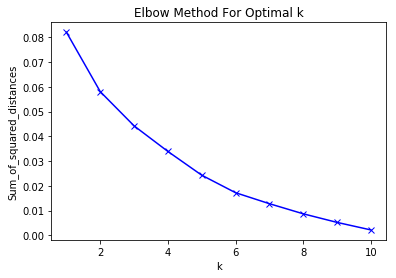

In [99]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Therefore, the best k is equal to 10
Let's check the clusters on map if k = 10

In [106]:
kcluster = 10

borough_venues_sorted.drop('Cluster Labels', axis=1, inplace=True)

kmeans = KMeans(n_clusters=kcluster, random_state=0).fit(toronto_grouped_clustering)
# Add clustering labels
borough_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = result

toronto_merged = toronto_merged.join(borough_venues_sorted.set_index('Borough'), on='Borough')

map_clusters = folium.Map(location = [toronto_lat, toronto_long], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kcluster)
ys = [i + x + (i*x)**2 for i in range(kcluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Borough'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
    
map_clusters

### 6.1.2: The Silhouette Method

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

The Silhouette Value s(i) for each data point i is defined as follows:

![alt text](https://miro.medium.com/max/295/1*vFXfyIjIjI_kbZNWODiuxQ.jpeg "Calculation Formula")

* Here, a(i) is the measure of similarity of the point i to its own cluster. It is measured as the average distance of i from other points in the cluster.

![alt text](https://miro.medium.com/max/403/1*OFOXVdMIwldl8diJvscw_A.jpeg "Calculation Formula")

* Similarly, b(i) is the measure of dissimilarity of i from points in other clusters.

![alt text](https://miro.medium.com/max/293/1*fGgqT3IHwpEOiDbCtN5dAQ.jpeg "Calculation Formula")

* d(i, j) is the distance between points i and j. Generally, Euclidean Distance is used as the distance metric.

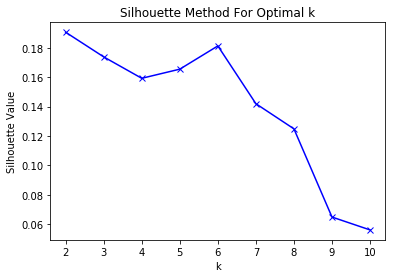

In [111]:
from sklearn.metrics import silhouette_score

sil = []
K = range(2,11)

for k in K:
  kmeans = KMeans(n_clusters = k).fit(toronto_grouped_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(toronto_grouped_clustering, labels, metric = 'euclidean'))

    
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Value')
plt.title('Silhouette Method For Optimal k')
plt.show()

### Apparently, the optimal k is still 10

### 6.2: Examine Clusters

In [117]:
from tabulate import tabulate
for label in range(0, 11):
    print("---------- Cluster " + str(label) + " -----------------")
    print(tabulate(toronto_merged.loc[toronto_merged['Cluster Labels'] == label, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]))

---------- Cluster 0 -----------------
--  ----------------  -  -----------  ----  ----  -----  ------------------
 2  Downtown Toronto  0  Coffee Shop  Café  Park  Hotel  Italian Restaurant
 4  Downtown Toronto  0  Coffee Shop  Café  Park  Hotel  Italian Restaurant
 9  Downtown Toronto  0  Coffee Shop  Café  Park  Hotel  Italian Restaurant
15  Downtown Toronto  0  Coffee Shop  Café  Park  Hotel  Italian Restaurant
20  Downtown Toronto  0  Coffee Shop  Café  Park  Hotel  Italian Restaurant
24  Downtown Toronto  0  Coffee Shop  Café  Park  Hotel  Italian Restaurant
25  Downtown Toronto  0  Coffee Shop  Café  Park  Hotel  Italian Restaurant
30  Downtown Toronto  0  Coffee Shop  Café  Park  Hotel  Italian Restaurant
36  Downtown Toronto  0  Coffee Shop  Café  Park  Hotel  Italian Restaurant
42  Downtown Toronto  0  Coffee Shop  Café  Park  Hotel  Italian Restaurant
48  Downtown Toronto  0  Coffee Shop  Café  Park  Hotel  Italian Restaurant
80  Downtown Toronto  0  Coffee Shop  Café  Park 